In [1]:
from pathlib import Path
import  numpy as np, cv2, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
DATA_DIR = r"/Users/f44znzw/Documents/A_Allgemeine Unterlagen/A_12 Schulungsunterlagen/Camp2Code/VS/project_phase_2/github/C2C_PP_02/pictures"
IMG_SIZE = (128, 128)

In [3]:
def load_iamges_labels(folder):
    paths = sorted(Path(folder).glob("*.jpg"))

    imgs = []
    labels = []

    for p in paths:
        img = cv2.imread(str(p))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
        labels.append(int(str(p).split("_")[-1].split(".")[0]))

    return imgs, labels


In [4]:
imgs, labels = load_iamges_labels(DATA_DIR)

In [5]:
len(imgs)

1195

In [6]:
len(labels)

1195

In [7]:
def preprocess_image(img, target_size=IMG_SIZE):
    return cv2.resize(img, target_size)


def preprocess_batch(imgs, target_size=IMG_SIZE):
    out = [preprocess_image(img, target_size) for img in imgs]
    out = np.asarray(out) / 255
    return out


In [8]:
y = np.asarray(labels)

In [9]:
y

array([101, 110, 109, ..., 110,  90,  92])

In [10]:
X = preprocess_batch(imgs)

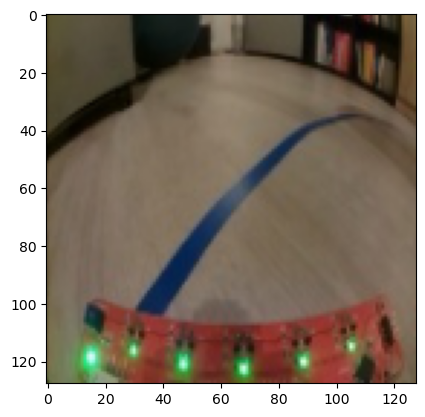

In [11]:
plt.imshow(X[19, :, :, :])

In [12]:
def show_examples(images, labels, n=8, title="Beispiele"):
    n = min(n, len(images))
    idx = np.random.choice(len(images), n, replace=False)
    cols = 4; rows = int(np.ceil(n / cols))
    plt.figure(figsize=(12, 3*rows))
    for i, j in enumerate(idx, 1):
        plt.subplot(rows, cols, i)
        img = images[j]
        if img.dtype != np.uint8:
            img = (np.clip(img, 0, 1) * 255).astype(np.uint8)
        plt.imshow(img); plt.title(f"Label: {labels[j]}"); plt.axis("off")
    plt.suptitle(title); plt.tight_layout(); plt.show()

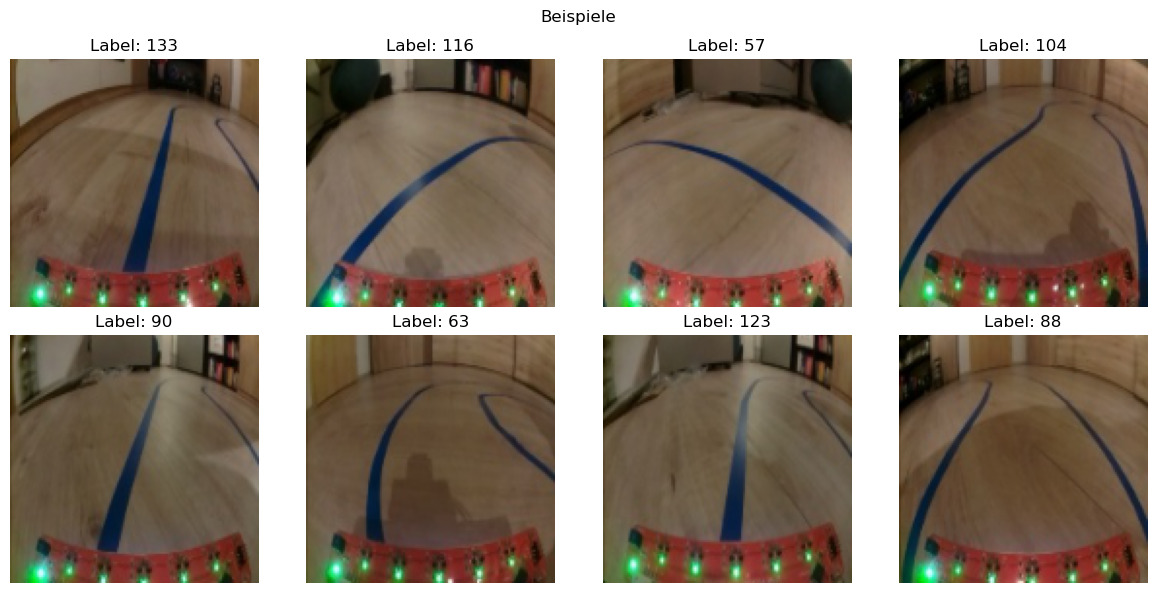

In [13]:
show_examples(X, y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(956, 128, 128, 3)

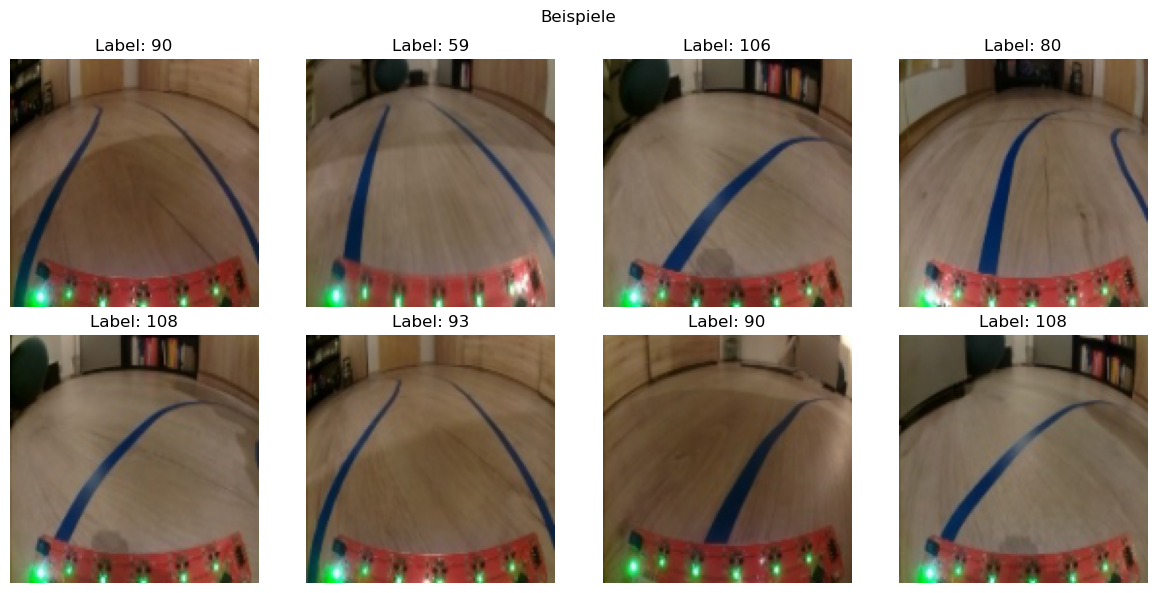

In [16]:
show_examples(X_train, y_train)

In [17]:
def mirror_with_label(images, labels):
    X_m = [ img[:,::-1, :]  for img in images]
    y_m = [180 - label for label in labels]

    return X_m, y_m

In [18]:
X_train_m, y_train_m = mirror_with_label(X_train, y_train)

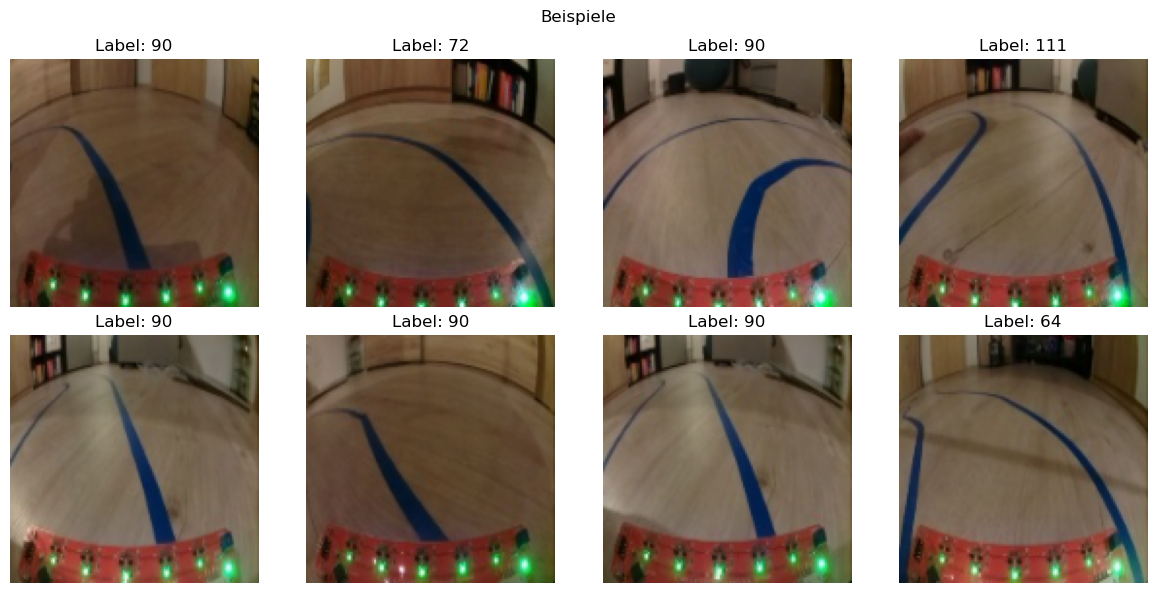

In [19]:
show_examples(X_train_m, y_train_m)

In [20]:
X_train_pool = np.concatenate([X_train , X_train_m])
y_train_pool = np.concatenate([y_train , y_train_m])

In [21]:
X_train_pool.shape

(1912, 128, 128, 3)

In [22]:
y_train_pool.shape

(1912,)

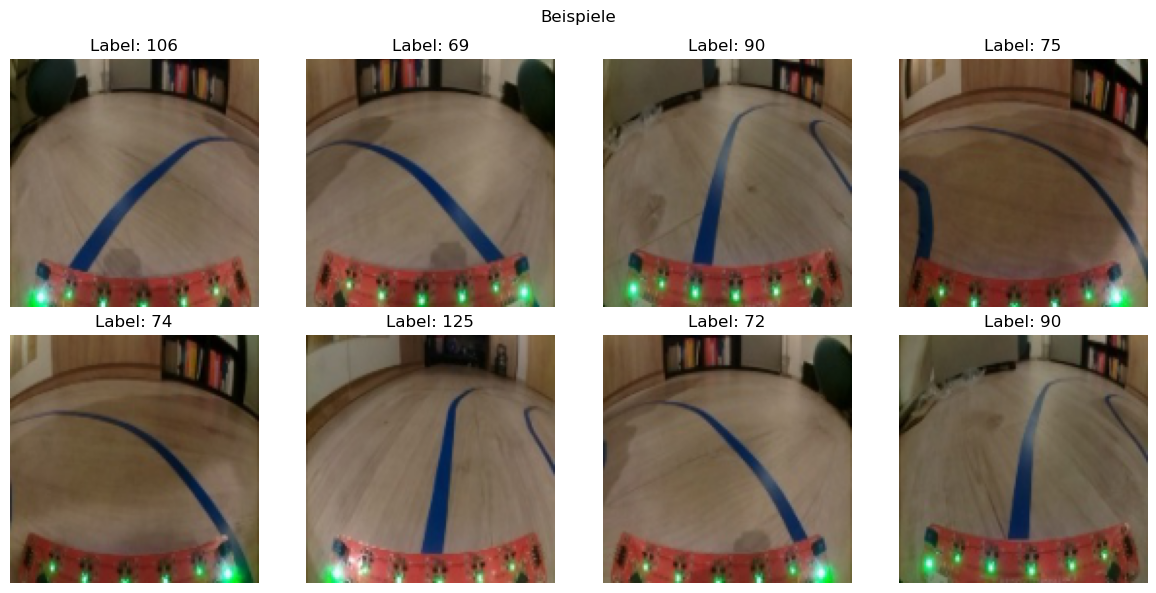

In [23]:
show_examples(X_train_pool, y_train_pool)

(array([ 1.,  9., 12., 28., 97., 22., 34., 23.,  5.,  8.]),
 array([ 47. ,  55.8,  64.6,  73.4,  82.2,  91. ,  99.8, 108.6, 117.4,
        126.2, 135. ]),
 <BarContainer object of 10 artists>)

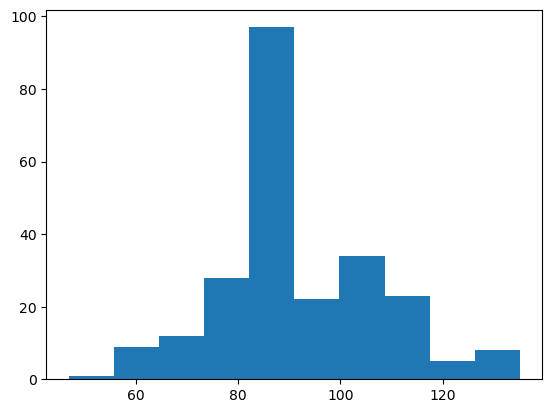

In [24]:
plt.hist(y_test)

In [25]:
size = (*IMG_SIZE, 3)
size


(128, 128, 3)

In [26]:
model = keras.Sequential([
    layers.Input(shape=size),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, (5, 5), activation="relu"),
    layers.MaxPooling2D(2),
    layers.Dropout(0.25),
    #layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(1)
])


In [27]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [28]:
history = model.fit(X_train_pool, y_train_pool, epochs=12, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/12
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 1572.8987 - mae: 30.1050 - val_loss: 416.5687 - val_mae: 16.7315
Epoch 2/12
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 469.1170 - mae: 17.4229 - val_loss: 415.4333 - val_mae: 16.1768
Epoch 3/12
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 443.9858 - mae: 16.4899 - val_loss: 345.5143 - val_mae: 15.1002
Epoch 4/12
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 395.8867 - mae: 15.5254 - val_loss: 299.3415 - val_mae: 13.5902
Epoch 5/12
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 383.1748 - mae: 15.1982 - val_loss: 287.8604 - val_mae: 13.3013
Epoch 6/12
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 382.4055 - mae: 15.4113 - val_loss: 465.5637 - val_mae: 17.8881
Epoch 7/12
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 384.0775 - mae: 15.3875 - val_loss: 299.7768 - val_mae: 13.6368
Epoch 8/12
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 332.3627 - mae: 14.1960 - val_loss: 243.9239 - val_mae: 11.6340
Epoch 9

In [29]:
239**0.5

15.459624833740307

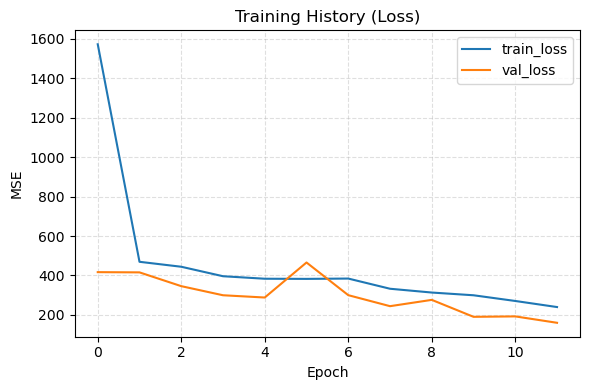

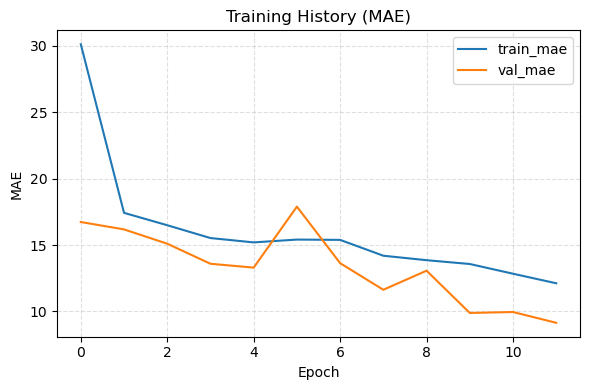

In [30]:
# History-Plots
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.title("Training History (Loss)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["mae"], label="train_mae")
plt.plot(history.history["val_mae"], label="val_mae")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.title("Training History (MAE)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout(); plt.show()


In [31]:
y_pred = model.predict(X_test).ravel()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [32]:
y_pred

array([ 87.35282 ,  94.39753 , 110.115204,  97.866394,  93.46456 ,
        96.00178 ,  82.10063 ,  89.26878 , 105.49909 ,  96.42824 ,
        88.75978 ,  83.98059 ,  95.93166 ,  95.87897 ,  84.855194,
        83.765495, 109.2957  , 101.41693 ,  81.26628 ,  85.51019 ,
        93.315506,  78.36234 ,  77.550446,  79.67125 ,  91.438995,
        87.56143 ,  99.51364 ,  85.73129 ,  99.382515,  89.14113 ,
        85.238   ,  94.049706,  83.3442  ,  85.87692 ,  90.31777 ,
        95.01667 ,  80.979034,  97.47536 ,  88.44241 ,  81.22838 ,
        95.2966  , 105.20739 ,  89.24414 ,  79.44226 ,  82.385185,
        87.74872 ,  87.538414, 101.43537 ,  92.43162 , 101.82849 ,
        88.3416  , 108.05311 ,  62.390278,  94.49391 ,  87.4483  ,
       102.36667 ,  83.91489 ,  78.642334,  84.7505  ,  78.68587 ,
        76.61139 ,  80.87973 ,  83.6375  ,  93.4303  ,  96.74013 ,
       103.00926 ,  95.82926 ,  98.77946 ,  85.356384,  88.5441  ,
        89.97244 ,  91.02948 ,  96.85327 ,  93.98977 ,  97.393

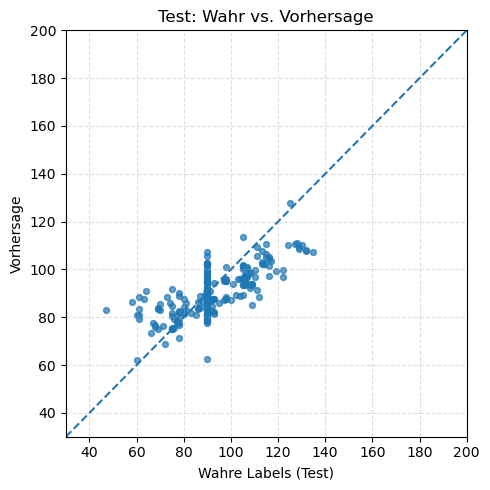

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=18, alpha=0.7)
plt.plot([30,200],[30,200], linestyle="--")
plt.xlim(30,200); plt.ylim(30,200)
plt.xlabel("Wahre Labels (Test)"); plt.ylabel("Vorhersage")
plt.title("Test: Wahr vs. Vorhersage"); plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [34]:
error = np.abs(y_pred - y_test)

In [35]:
error

array([2.64717865e+00, 4.39752960e+00, 1.98847961e+01, 7.86639404e+00,
       1.45354385e+01, 6.00177765e+00, 4.10063171e+00, 7.31216431e-01,
       5.50090790e+00, 8.57176208e+00, 1.75978088e+00, 6.01940918e+00,
       8.06833649e+00, 1.01210327e+01, 7.14480591e+00, 1.47654953e+01,
       1.70429993e+00, 3.58306885e+00, 1.17337189e+01, 4.48980713e+00,
       1.16844940e+01, 1.16376572e+01, 1.05504456e+01, 1.03287506e+01,
       1.43899536e+00, 7.56143188e+00, 1.94863586e+01, 4.73129272e+00,
       9.38251495e+00, 1.28588715e+01, 4.76200104e+00, 1.49502945e+01,
       6.65579987e+00, 1.18769226e+01, 3.17771912e-01, 1.09833298e+01,
       9.02096558e+00, 8.52464294e+00, 2.35575867e+01, 1.22837830e+00,
       1.70339966e+00, 1.07926102e+01, 7.55859375e-01, 1.44226074e+00,
       4.38518524e+00, 2.47487183e+01, 1.04615860e+01, 1.14353714e+01,
       2.43161774e+00, 1.18284912e+01, 2.73415985e+01, 2.39468918e+01,
       2.76097221e+01, 4.49391174e+00, 5.55169678e+00, 1.06333313e+01,
      

In [36]:
np.argmax(error)

np.int64(82)

In [37]:
y_test[23]

np.int64(90)

In [38]:
y_pred[23]

np.float32(79.67125)

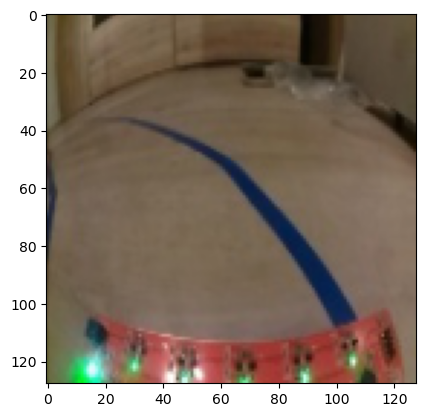

In [39]:
plt.imshow(X_test[23, :,: ,:])

In [48]:
model.save("live_model_Andi.keras")